In [ ]:
import itertools
import numpy as np
import os
from tqdm import tqdm
import vsketch
import shapely.geometry as sg
from shapely.geometry import box, MultiLineString, Point, MultiPoint, Polygon, MultiPolygon, LineString
import shapely.affinity as sa
import shapely.ops as so
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from genpen import genpen as gp, utils as utils
from scipy import stats as ss
import geopandas
import functools

%load_ext autoreload
%autoreload 2

from genpen.utils import Paper
import bezier
from dataclasses import asdict, dataclass, field

In [ ]:
# make page
paper_size = '11x17 inches'
border:float=35
paper = Paper(paper_size)

drawbox = paper.get_drawbox(border)

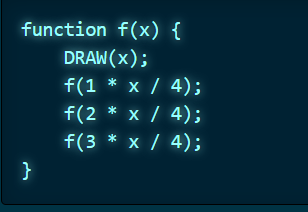

In [ ]:
class Turtle(object):
    
    def __init__(self, loc=Point(0,0), rad=0, pen='up', delta_rad=np.pi/6, parent=None):
        self.loc = loc
        self.rad = rad
        self.pen = pen
        self.tree_depth = 0
        self.delta_rad = np.pi/6
        self.parent = parent
        self.alive = True
        self.lines = MultiLineString()
        self.pts_in_current_line = []
        
    def __repr__(self):
         return f'''
         Cowabunga it is
         pos=({self.x}, {self.y})
         pen={self.pen}
         rad={self.rad}
         tree_depth={self.tree_depth}'''
        
    @property
    def x(self):
        return self.loc.x
    
    @x.setter
    def x(self, x):
        self.loc = Point(x, self.y)
    
    @property
    def y(self):
        return self.loc.y
    
    @y.setter
    def y(self, y):
        self.loc = Point(self.x, y)
    
    @property
    def degrees(self):
        return self.rad / (np.pi * 2) * 360
    
    @degrees.setter
    def degrees(self, degrees):
        self.rad = degrees / 360 * np.pi * 2
    
    @property
    def current_line(self):
        if len(self.pts_in_current_line) > 1:
            return LineString(self.pts_in_current_line)
        
    @current_line.setter
    def current_line(self, current_line):
        self.pts_in_current_line = [Point(p) for p in current_line]
    
    def add_point(self):
        self.pts_in_current_line.append(self.loc)
        
    def pen_down(self):
        self.pen = 'down'
        self.add_point()
        
    def pen_up(self):
        self.pen = 'up'
        self.finish_line()
        
    def finish_line(self):
        self.lines = gp.merge_LineStrings([self.lines, self.current_line])
        self.pts_in_current_line = []
        
    def forward(self, d):
        self.x += np.cos(self.rad) * d
        self.y += np.sin(self.rad) * d
        if self.pen == 'down':
            self.add_point()
            
    def F(self, d=1):
        self.pen_down()
        self.forward(d)
        
    def f(self, d=1):
        self.pen_up()
        self.forward(d)
            
    def turn(self, d_angle, use_degrees=False):
        if use_degrees:
            new_degrees = self.degrees + d_angle
            self.degrees = new_degrees % 360
        else:
            new_rad = self.rad + d_angle
            self.rad = new_rad % (np.pi * 2)
        
    def plus(self):
        self.turn(self.delta_rad)
        
    def minus(self):
        self.turn(-self.delta_rad)
    
    def circle(self, radius, extent=(np.pi*2), n_eval_points=1000, use_degrees=False):
        
        d_angle = extent / n_eval_points
        forward_d = abs(d_angle * radius)
        if use_degrees:
            forward_d = forward_d / 360 * (2 * np.pi)
        for n in range(n_eval_points):
            self.forward(forward_d)
            self.turn(d_angle, use_degrees=use_degrees)

In [ ]:
global all_lines

In [ ]:
class drawer(object):
    
    def __init__(self, loc, rad):
        self.pts = [loc]
        self.angle = np.random.uniform(0, 30)
        self.rad
        
    @property
    def mpts(self):
        return MultiPoint(self.pts)
    
    @property
    def lines(self):
        return LineString(self.pts)
    
    def draw(self, x):
        self.t = Turtle(loc)
        self.t.forward(x)
        

In [ ]:
def DRAW(x):
    np.sin(np.pi*x)

In [ ]:
def f(x):
    